In [1]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1. Load the dataset
# Source: http://lib.stat.cmu.edu/datasets/boston
# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
# prices and the demand for clean air', J. Environ. Economics & Management,
# vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
# ...', Wiley, 1980.   N.B. Various transformations are used in the table on
# pages 244-261 of the latter.
# Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's
df_raw = pd.read_csv('../data/raw/boston.csv')

In [3]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# 1.2 Take a sample
df_raw.sample(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
83    0.03551  25.0   4.86   0.0  0.426  6.167   46.7  5.4007   4.0  281.0   
133   0.32982   0.0  21.89   0.0  0.624  5.822   95.4  2.4699   4.0  437.0   
145   2.37934   0.0  19.58   0.0  0.871  6.130  100.0  1.4191   5.0  403.0   
427  37.66190   0.0  18.10   0.0  0.679  6.202   78.7  1.8629  24.0  666.0   
319   0.47547   0.0   9.90   0.0  0.544  6.113   58.8  4.0019   4.0  304.0   
109   0.26363   0.0   8.56   0.0  0.520  6.229   91.2  2.5451   5.0  384.0   
236   0.52058   0.0   6.20   1.0  0.507  6.631   76.5  4.1480   8.0  307.0   
175   0.06664   0.0   4.05   0.0  0.510  6.546   33.1  3.1323   5.0  296.0   
235   0.33045   0.0   6.20   0.0  0.507  6.086   61.5  3.6519   8.0  307.0   
41    0.12744   0.0   6.91   0.0  0.448  6.770    2.9  5.7209   3.0  233.0   

     PTRATIO       B  LSTAT  MEDV  
83      19.0  390.64   7.51  22.9  
133     21.2  388.69  15.03  18.4  
145     14.7  172.91  27.80  13.8  
427     20.2   18.82  14.52  10.9  
319     18.4  396.23  12.73  21.0  
109     20.9  391.23  15.55  19.4  
236     17.4  388.45   9.54  25.1  
175     16.6  390.96   5.33  29.4  
235     17.4  376.75  10.88  24.0  
41      17.9  385.41   4.84  26.6

In [5]:
# 1.3 Transform if needed
df_transform = df_raw.drop(['B'], axis=1)
df = df_transform.copy()
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

In [6]:
# Step 2. Make a basic EDA
X=df.iloc[:,:12]
y=df.iloc[:,12]


In [7]:
# 2.1 Split the dataset so to avoid bias
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [8]:
X

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO  LSTAT  
0       15.3   4.98  
1       17.8   9.14  
2       17.8   4.03  
3       18.7   2.94  
4       18.7   5.33  
..       ...    ...  
501     21.0   9.67  
502     21.0   9.08  
503     21.0   5.64  
504     21.0   6.48  
505     21.0   7.88  

[506 rows x 12 columns]

In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
# 2.2 Join the train sets to ease insights
df_train = pd.concat((X_train, y_train), axis=1)

In [11]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 163 to 456
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  LSTAT    379 non-null    float64
 12  MEDV     379 non-null    float64
dtypes: float64(13)
memory usage: 41.5 KB


In [12]:
# 2.4 Take a sample
df_train.sample(10)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
152  1.12658   0.0  19.58   1.0  0.871  5.012  88.0  1.6102   5.0  403.0   
76   0.10153   0.0  12.83   0.0  0.437  6.279  74.5  4.0522   5.0  398.0   
49   0.21977   0.0   6.91   0.0  0.448  5.602  62.0  6.0877   3.0  233.0   
348  0.01501  80.0   2.01   0.0  0.435  6.635  29.7  8.3440   4.0  280.0   
113  0.22212   0.0  10.01   0.0  0.547  6.092  95.4  2.5480   6.0  432.0   
472  3.56868   0.0  18.10   0.0  0.580  6.437  75.0  2.8965  24.0  666.0   
274  0.05644  40.0   6.41   1.0  0.447  6.758  32.9  4.0776   4.0  254.0   
328  0.06617   0.0   3.24   0.0  0.460  5.868  25.8  5.2146   4.0  430.0   
465  3.16360   0.0  18.10   0.0  0.655  5.759  48.2  3.0665  24.0  666.0   
361  3.83684   0.0  18.10   0.0  0.770  6.251  91.1  2.2955  24.0  666.0   

     PTRATIO  LSTAT  MEDV  
152     14.7  12.12  15.3  
76      18.7  11.97  20.0  
49      17.9  16.20  19.4  
348     17.0   5.99  24.5  
113     17.8  17.09  18.7  
472     20.2  14.36  23.2  
274     17.6   3.53  32.4  
328     16.9   9.97  19.3  
465     20.2  14.13  19.9  
361     20.2  14.19  19.9

In [13]:
# 2.5 Describe the numerical and date variables
df_train.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     3.544779   11.213720   11.124828    0.060686    0.555395    6.293245   
std      8.843378   23.314601    6.840538    0.239069    0.116113    0.711019   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082865    0.000000    5.190000    0.000000    0.451000    5.895500   
50%      0.269380    0.000000    9.690000    0.000000    0.538000    6.249000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.630000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    68.360950    3.751303    9.464380  407.617414   18.437203   12.584485   
std     28.563333    2.042150    8.592828  167.695835    2.180545    7.173761   
min      2.900000    1.137000    1.000000  187.000000   12.600000    1.730000   
25%     43.000000    2.100350    4.000000  279.500000   17.350000    6.885000   
50%     77.300000    3.215700    5.000000  330.000000   19.000000   11.220000   
75%     94.100000    5.108550   24.000000  666.000000   20.200000   17.130000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             MEDV  
count  379.000000  
mean    22.681003  
std      9.209861  
min      5.000000  
25%     17.150000  
50%     21.200000  
75%     25.750000  
max     50.000000

In [28]:
# 2.6 Describe the categorical variables
#CHAS is categorical

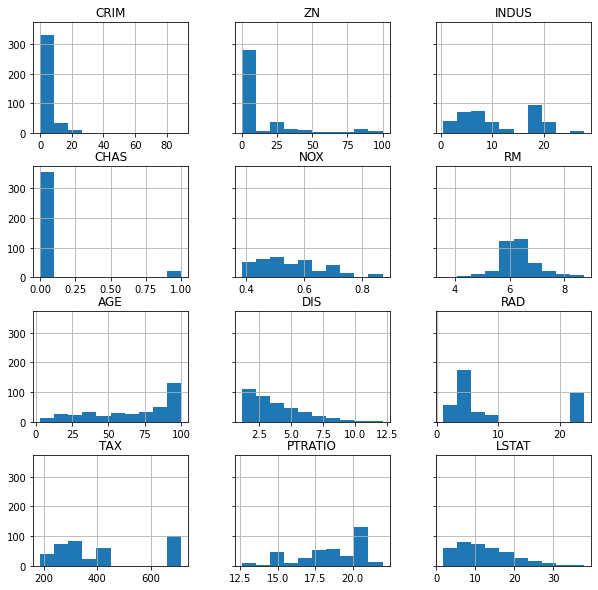

In [27]:
# 2.7 Perform univariate analysis - histograms
#X_train.hist(figsize=(10,10))
X_train.hist(figsize=(10,10),sharey=True)
plt.show()

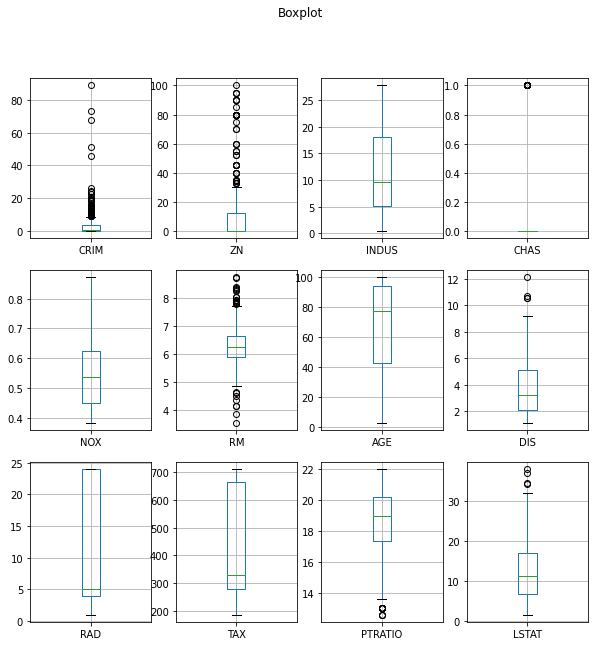

In [30]:
# 2.8 Perform univariate analysis - boxplots
fig, ax = plt.subplots(3,4, figsize=(10,10))
axs = ax.flatten()
for i in range(12):
    X_train.iloc[:,i].to_frame().boxplot(ax=axs[i])

plt.suptitle('Boxplot')
plt.show()

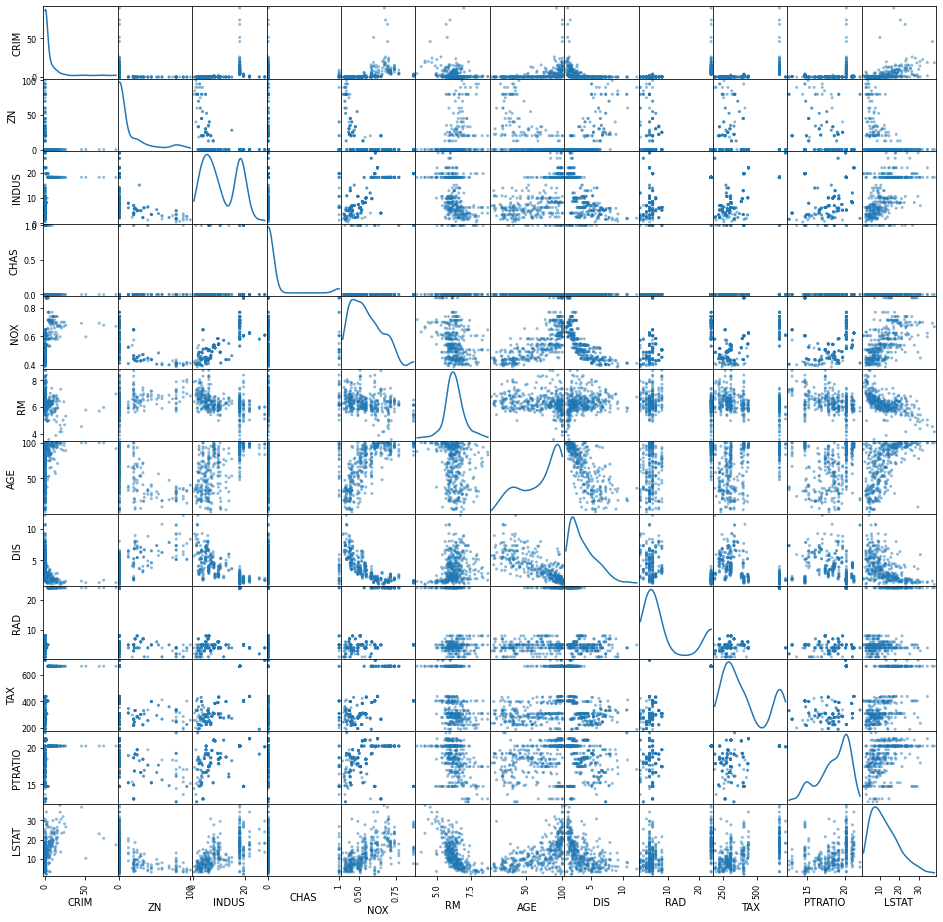

In [33]:
# 2.9 Perform bivariate analysis - scatter matrix
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(16,16))
plt.show()

In [36]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
X_train.corr().style.background_gradient(cmap='Blues')

# cuando está mas arriba de 0.7 cuanto más oscuro (azul) o más abajo de -0.7 cuanto más claro (blanco) están más correlacionada

In [39]:
#Para que se vea mejor la correlación
abs(X_train.corr()).style.background_gradient(cmap='Blues')

In [40]:
# 2.11 Perform multivariate analysis - VIF
X_train_no_corr = X_train.drop(['TAX','DIS'], axis=1)
X_train_no_corr

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   RAD  PTRATIO  LSTAT
163   1.51902   0.0  19.58   1.0  0.605  8.375  93.9   5.0     14.7   3.32
228   0.29819   0.0   6.20   0.0  0.504  7.686  17.0   8.0     17.4   3.92
84    0.05059   0.0   4.49   0.0  0.449  6.389  48.0   3.0     18.5   9.62
189   0.08370  45.0   3.44   0.0  0.437  7.185  38.9   5.0     15.2   5.39
322   0.35114   0.0   7.38   0.0  0.493  6.041  49.9   5.0     19.6   7.70
..        ...   ...    ...   ...    ...    ...   ...   ...      ...    ...
375  19.60910   0.0  18.10   0.0  0.671  7.313  97.9  24.0     20.2  13.44
133   0.32982   0.0  21.89   0.0  0.624  5.822  95.4   4.0     21.2  15.03
396   5.87205   0.0  18.10   0.0  0.693  6.405  96.0  24.0     20.2  19.37
245   0.19133  22.0   5.86   0.0  0.431  5.605  70.2   7.0     19.1  18.46
456   4.66883   0.0  18.10   0.0  0.713  5.976  87.9  24.0     20.2  19.01

[379 rows x 10 columns]

In [20]:
# Step 3. Create and evaluate model - Define your approach and goals

In [43]:
# 3.1 Perform model fit - A
pipe = make_pipeline(MinMaxScaler(),Ridge()) #primero hacemos el MinMaxScaler para escalar los datos y después el Ridge (regresión lineal con tuneo, juega con los pesos y saca los valiosos)
scores = cross_validate(pipe, X_train_no_corr, y_train, return_train_score=True)
pd.DataFrame(scores)


fit_time  score_time  test_score  train_score
0  0.006068    0.001892    0.683441     0.706700
1  0.003726    0.001686    0.509323     0.747962
2  0.003710    0.001507    0.809594     0.666984
3  0.003115    0.001443    0.679611     0.705765
4  0.003070    0.001563    0.688425     0.705948

In [44]:
# 3.2 Perform model fit - B
scores_dict = {'alpha':10.0**np.arange(-2,6,1),'mean_train_scores':list(),'mean_cv_scores':list()}
for alpha in scores_dict['alpha']:
    pipe_ridge = make_pipeline(MinMaxScaler(), Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train_no_corr, y_train, return_train_score=True)
    scores_dict['mean_train_scores'].append(scores['train_score'].mean())
    scores_dict['mean_cv_scores'].append(scores['test_score'].mean())

pd.DataFrame(scores_dict)



alpha  mean_train_scores  mean_cv_scores
0       0.01           0.710780        0.673570
1       0.10           0.710724        0.674095
2       1.00           0.706672        0.674079
3      10.00           0.614655        0.592125
4     100.00           0.314924        0.297850
5    1000.00           0.061863        0.044266
6   10000.00           0.006858       -0.011137
7  100000.00           0.000693       -0.017351

alphas muy pequeños genera overfit
alphas muy grandes genera underfit, son muy malos

In [23]:
# 3.3 Calculate metrics on model A

In [24]:
# 3.4 Calculate metrics on model B

In [25]:
# Step 4. Write up your conclusions